<h1 style='font-size:40px'> Training Models</h1>

<h2 style='font-size:30px'> Esclarecimentos</h2>
<div> 
    <ul style='font-size:20px'>
        <li> 
            Este é o meu segundo estudo sobre o quarto capítulo do livro. O objetivo deste registro é, agora, consolidar o meu entendimento sobre a esfera matemática do treinamento em Machine Learning.
        </li>
    </ul>
</div>

<h2 style='font-size:30px'> Notations (p.43)</h2>
<div> 
    <ul style='font-size:20px'>
        <li> 
            m é o tamanho do dataset com o qual avaliamos o modelo.
            <ul style='list-style-type:circle'> 
                <li> 
                    Se o set de validação tem 5000 instâncias, $m=5000$
                </li>
            </ul>
        </li>
        <li style='margin-top:10px'> 
            $x^{(i)}$ é o vetor com os valores de todas as features independentes da i-ésima instância do dataset. $y^{(i)}$ é a sua variável-alvo.
            <ul style='list-style-type:circle'> 
                <li> 
                    Se a nona feature do dataset tem como features independentes 200, 4500, 100 e 9 $x^{(9)}=\begin{bmatrix} 200\\4500\\1000\\9\end{bmatrix}$. 
                </li>
                <li> 
                    Caso sua target-variable seja 3, $y^{(9)}=\begin{bmatrix}3\end{bmatrix}$
                </li>
            </ul>
        </li>
        <li style='margin-top:10px'> 
            X é a matrix com os valores das features independentes de cada instância. Esses, por sua vez, estão contidos em um vetor-linha, e não coluna. Portanto, para um dataset com 2000 instâncias:
            $$
                X=\begin{bmatrix} 
                (x^{(1)})^{T} \\
                (x^{(2)})^{T} \\
                \vdots \\
                (x^{(2000)})^{T}
                \end{bmatrix}
            $$
        </li>
        <li style='margin-top:10px'> 
            $h$ representa o nosso modelo de ML, que, para cada instância, lança uma previsão $ŷ$. Dessa maneira, $h(x^{(i)})=ŷ^{(i)}$
             <ul style='list-style-type:circle'> 
                <li> 
                    O erro absoluto de um algoritmo regressor será $ŷ^{(i)}-y^{(i)}$
                </li>
            </ul>
        </li>
        <li style='margin-top:10px'> 
            $RMSE(X, h)$, $R^{2}(X,h)$ representam a função custo aplicada no set $X$ com o modelo $h$. 
        </li>
        <li> 
            $J(\theta)$ se referirá a qualquer função-custo com nome muito extenso. 
        </li>
    </ul>
</div>

<h2 style='font-size:30px'> Métricas de Regressão</h2>
<div> 
    <ul style='font-size:20px'>
        <li> 
             RMSE, também conhecida como Euclidean Norm ou $l_2$ norm. Sua fórmula é:
            $$
            RMSE(X,h)=\sqrt{\frac{1}{m}\sum_{i=1}^{m}(h(x^{(i)})-y^{(i)})^{2}}
            $$
        </li>
        <li style='margin-top:10px'> 
            MAE, também conhecida como Manhattan Norm ou $l_1$ norm. Sua fórmula é:
            $$
                    MAE(X,h)=\frac{1}{m}\sum_{i=1}^{m} |h(x^{(i)})-y^{(i)}| 
            $$
        </li>
    </ul>
</div>

<h2 style='font-size:30px'> Início de Fato do Capítulo</h2>
<div> 
    <ul style='font-size:20px'>
        <li> 
            Neste capítulo, aprenderemos os principais métodos de treinamento em ML, assim como alguns modelos mais simples.
        </li>
        <li> 
            Há maneiras mais diretas de alcançarmos os parâmetros ideais do modelo, e outras que envolvem iterações.
        </li>
    </ul>
</div>

<h2 style='font-size:30px'> Linear Regression</h2>
<div> 
    <ul style='font-size:20px'>
        <li> 
            A Regressão Linear é o modelo mais simples do ML. Consiste na soma ponderada de cada feature por um coeficiente. Uma previsão ŷ é dada como:
            <p>$
                ŷ=\theta_0 + \theta_1 x_1 + \theta_2 x_2 + \dots + \theta_n x_n
            $ ($\theta_0$ é o termo de bias).
            </p>         
        </li>
        <li> 
            Uma maneira mais concisa de formular essa equação é:
            $$
                ŷ=h_{\theta}(x)=\theta \cdot x
            $$
            <ul style='list-style-type:circle'> 
                <li> 
                    $\theta$ é o vetor com os coeficientes do modelo.
                </li>
                <li> 
                    x é o vetor com os valores das features.
                </li>
                <li> 
                    $\theta \cdot x$ é o produto escalar entre os vetores mencionados, igual a $\theta_0 + \theta_1 x_1 + \theta_2 x_2 + \dots + \theta_n x_n
            $
                </li>
            </ul>
        </li>
        <li> 
            Nota: A previsão do modelo ainda pode ser dada como $ŷ=\theta^{T}x$, que é a multiplicação entre a transposta dos coeficientes e x.
        </li>
    </ul>
</div>

In [1]:
import numpy as np
theta = np.random.random(size=3)
x = np.random.normal(size=3)

# Observe como o dot product e a multiplicação matricial se equivalem.
theta.dot(x), theta.T@x

(0.016455765915880542, 0.016455765915880542)

<div> 
    <ul style='font-size:20px'>
        <li> 
             A criação de uma Regressão Linear envolve encontrar o $\theta$ que minimiza o MSE. Agora, é hora de explorarmos os diferentes métodos para que isso ocorra.        
        </li>
    </ul>
</div>

<h2 style='font-size:30px'> The Normal Equation</h2>

<div> 
    <ul style='font-size:20px'>
        <li> 
             A Equação Normal é uma maneira direta de alcançarmos o $\theta$ minimizador do MSE. A sua fórmula é:
            $$
                \theta=(X^{T}X)^{-1}X^{T}y
            $$
            <ul style='list-style-type:circle'> 
                <li> 
                    y é o vetor com as target variables.
                </li>
            </ul>
        </li>
    </ul>
</div>

In [2]:
# Aplicando a Equação Normal com o Numpy.
X = np.random.normal(size=(1000,1))
y = 10 + 4*X - np.random.normal(size=(1000,1))

# Adicionando a coluna de bias a X.
X_b = np.c_[np.ones((1000,1)), X]
theta_best = np.linalg.inv(X_b.T@X_b) @ X_b.T @ y
theta_best

array([[9.97970517],
       [4.0322335 ]])

In [3]:
# Fazendo uma previsão com uma nova instância.
X_new = np.array([5])
X_new_b = np.c_[np.ones((1,1)), X_new]

X_new_b.dot(theta_best)

array([[30.14087266]])

In [4]:
# Essa mesma equação poderia ser escrita com os dot products entre as matrizes.
np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

array([[9.97970517],
       [4.0322335 ]])

In [5]:
# O 'LinearRegression' obtém os mesmos parâmetros.
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression().fit(X,y)
lin_reg.intercept_, lin_reg.coef_

(array([9.97970517]), array([[4.0322335]]))

<h3 style='font-size:30px;font-style:italic'> Moore-Penrose Inverse</h3>
<div> 
    <ul style='font-size:20px'>
        <li> 
             Uma outra maneira de obtermos os coeficientes da nossa Regressão Linear é com o produto escalar entre a matriz Moore-Penrose de X (conhecida também como pseudoinversa) e y.
            $$
                \theta=X^{+}y
            $$
        </li>
    </ul>
</div>

In [6]:
# Use 'np.linalg.pinv' para computar a pseudoinversa de X.
theta_best = np.linalg.pinv(X_b).dot(y)
theta_best

array([[9.97970517],
       [4.0322335 ]])

<h2 style='font-size:30px'> Computational Complexity</h2>
<div> 
    <ul style='font-size:20px'>
        <li> 
            A Time Complexity para treinamento de uma Regressão Linear com a Normal Equation pode ser de $O(n^{2.4})$ a $O(n^{3})$ e $O(n^{2})$ com a Inversa Moore-Penrose (sendo n o número de features). Ambos os métodos são $O(m)$ (m é o número de instâncias).
        </li>
        <li> 
            Com previsões, as duas estratégias têm $O(n)$ e $O(m)$. 
        </li>
    </ul>
</div>

<h2 style='font-size:30px'> Gradient Descent</h2>
<div> 
    <ul style='font-size:20px'>
        <li> 
            O autor introduz os conceitos de Descida de Gradiente e learning rates.
        </li>
    </ul>
</div>

<h3 style='font-size:30px;font-style:italic'> Batch Gradient Descent</h3>
<div> 
    <ul style='font-size:20px'> 
        <li> 
            O Batch Gradient Descent consiste em fazer a descida de gradiente com base em todo o conjunto de treino. O Gradiente de uma MSE para a Regressão Linear é dado como:
            <p style='margin-top:10px'>
            $$
                \nabla_{\theta}MSE(\theta)=
                    \begin{bmatrix} 
                        \frac{\delta}{\delta\theta_{0}}MSE(\theta) \\ 
                        \frac{\delta}{\delta\theta_{1}}MSE(\theta) \\
                        \vdots \\
                        \frac{\delta}{\delta\theta_{n}}MSE(\theta) 
                    \end{bmatrix}                    
                    = \frac{2}{m}X^{T}(X\theta-y)
            $$
            </p>
        </li>
    </ul>
</div>

In [7]:
# Aplicando a Batch Gradient Descent em código.

eta = .01 # learning rate.
n_iterations = 1000 # número de iterações total.

# Inicialização aleatória dos parâmetros (segundo uma Distribuição Normal).
theta = np.random.uniform(size=(2,1))

for i in range(n_iterations):
    gradient = 2/len(X_b) * X_b.T.dot(X_b.dot(theta) - y)
    #print(gradient, end='\n\n')
    theta -=  eta*gradient
theta

array([[9.97970515],
       [4.03223348]])

<h3 style='font-size:30px;font-style:italic'> Stochastic Gradient Descent</h3>
<div> 
    <ul style='font-size:20px'> 
        <li> 
            A Descida de Gradiente Estocástica surge pela demora na computação do Gradiente com o set de treino completo. Esse novo método propõe selecionar uma única instância aleatória para a conta.
        </li>
        <li> 
            Observe que, por outro lado, a descida de gradiente será menos regular. Outliers também ganham um peso maior na computação, o dado da iteração pode ser um desses. 
        </li>
        <li> 
            Como o treinamento é mais instável, raramente alcançaremos a solução ótima, e sim, algo próximo. Uma estratégia para SGD é definir uma alta learning rate no início do fitting, para escaparmos dos mínimos locais, e reduzi-la, gradativamente, a fim de tentarmos nos alocar no mínimo global; se estivermos, de fato, na solução ótima, o vetor de gradiente estará severamente podado pelo menor $\eta$, impedindo de escaparmos dela.
        </li>
        <li> 
            Nota: O scikit-learn oferece uma série de outras estratégias para tratamento das learning rates.
        </li>
    </ul>
</div>

In [73]:
# O treinamento é bastante similar ao de uma Rede Neural. À cada época, uma certa quantidade de instâncias são selecionadas para
# o ajuste dos parâmetros.
from sklearn.base import RegressorMixin
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

class SGDLinearRegression(RegressorMixin):
    # 'theta' stores the LR coefficients.
    theta = None
    def __init__(self, eta0=.05, epochs=20, validation_split=.1, tol=1e-3, n_iter_no_change=3):
        self.eta0 = eta0 # Initial Learning Rate.
        self.epochs = epochs  # Number of Epochs.
        self.validation_split = validation_split # % of training set held for validation.
        self.tol = tol # Tolerance.
        self.n_iter_no_change = n_iter_no_change # Number of epochs with no improvement for training halt.
        
    def fit(self, X, y):
        SGDLinearRegression.theta = np.random.rand(X.shape[1],1)
        # Segregating training from validation data.
        X_train, X_val, y_train, y_val = train_test_split(X,y, test_size = self.validation_split)
        # Storing the 'theta' from the best epoch (lowest 'best_mse'). 
        best_theta, self.best_mse = SGDLinearRegression.theta, np.inf
        no_change = 0
        for epoch in range(self.epochs):
            for i in range(len(X_train)):
                # Randomly selecting the epoch's iteration instance.
                index = np.random.randint(len(X_train))
                xi = X_train[index:index+1]
                yi = y_train[index:index+1]
                # Computing the gradient based on the instance's data.
                gradients = (2 * xi.T.dot(xi.dot(SGDLinearRegression.theta ) - yi))
                SGDLinearRegression.theta = SGDLinearRegression.theta - (gradients * self.eta0)
            # At the end of the current epoch, the model performs a validation on 'X_val' and 'y_val'.
            # If no improvement is occurs, the learning rate is divided by 5.
            MSE = mean_squared_error(y_val, X_val.dot(SGDLinearRegression.theta))
            if MSE > self.best_mse - self.tol:
                no_change+=1
                self.eta0 /= 5
                # If the number of consecutive epochs with no MSE decay reaches 'n_iter_no_change', training is interrupted and the model
                # is re-adjusted with the coefficients from the best epoch.
                if no_change == self.n_iter_no_change:
                    SGDLinearRegression.theta =  best_theta
                    return self
            else:
                no_change = 0
                self.best_mse = MSE
                best_theta = SGDLinearRegression.theta            
        return self

<h3 style='font-size:30px;font-style:italic'> Mini-Batch Gradient Descent</h3>
<div> 
    <ul style='font-size:20px'> 
        <li> 
            A Mini-Batch GD surge como um meio termo entre os dois métodos já apresentados. Sua estratégia é medir, à cada iteração, o vetor de gradiente com base em um conjunto de instâncias aleatórias (e não apenas uma, como no SGD).
        </li>
        <li> 
            Essa abordagem torna a descida de gradiente mais estável e com uma sensibilidade menor à presença de outliers.
        </li>
    </ul>
</div>

<h2 style='font-size:30px'> Polynomial Regression</h2>
<div> 
    <ul style='font-size:20px'>
        <li> 
            Aqui, é apresentada a classe PolynomialFeatures, responsável por aumentar a dimensionalidade do dataset com base no produto entre as features.
        </li>
    </ul>
</div>

<h2 style='font-size:30px'> Learning Curves</h2>
<div> 
    <ul style='font-size:20px'>
        <li> 
            As Curvas de Aprendizado surgem como um recurso para analisarmos, em primeiro lugar, o quanto de instâncias seriam adequadas para que o modelo atinja o seu pleno potencial e, também, se está ocorrendo um under ou overfitting.
        </li>
    </ul>
</div>

In [9]:
from sklearn.model_selection import learning_curve
# Criando novas features.
X = np.random.normal(size=(1000,1))
y = 2.5*X**2 - 4*X + 5 + np.random.normal()

_, train_mse, test_mse = learning_curve(LinearRegression(), X, y, cv=5, scoring='neg_mean_squared_error', 
                                        train_sizes=np.linspace(.05, .75, 11))

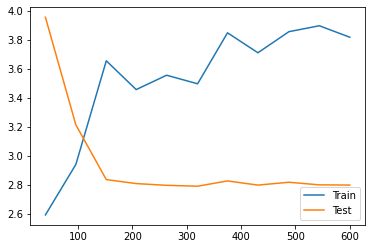

In [10]:
import matplotlib.pyplot as plt

# Observe, como treinamos uma Regressão Linear em uma função quadrática, recebemos um erro elevado nos sets de treino e teste.
# Ou seja, há um underfitting.
plt.plot(_, np.sqrt(-train_mse)[:, 0], label='Train')
plt.plot(_, np.sqrt(-test_mse)[:, 0], label='Test')
plt.legend()

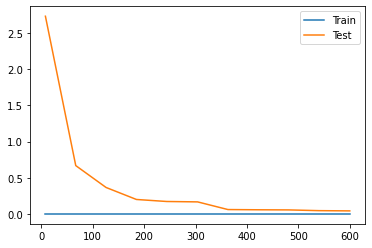

In [11]:
# Agora, forçaremos um overfitting treinando uma árvore de decisão sem regularizações.
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor

_, train_mse, test_mse = learning_curve(DecisionTreeRegressor(), X, y, train_sizes=np.linspace(.01, .75, 11), cv=5,
                                        scoring='neg_mean_squared_error')

# O overfitting pode ser detectado com altas performances no set de treino e baixas no de teste. O resultado poderia ter sido mais
# expressivo por aqui, mas fica como um exemplo.
plt.plot(_, np.sqrt(-train_mse)[:, 0], label='Train')
plt.plot(_, np.sqrt(-test_mse)[:, 0], label='Test')
plt.legend()

<h2 style='font-size:30px'> Bias/Variance Tradeoff</h2>
<div> 
    <ul style='font-size:20px'>
        <li> 
            <u>Bias</u>: seria a incapacidade de um modelo de se ajustar à toda complexidade do dataset. Algoritmos como a Regressão Linear têm um alto nível de bias por apenas conseguirem capturar relações estritamente lineares; é provável que haja um underfitting ao usá-los.
        </li>
        <li> 
            <u> Variance</u> consiste na elevada variância qualitativa das previsões em diferentes datasets. Isso, normalmente, ocorre pelo uso de um modelo muito complexo, que se superadequa aos padrões do set de treino e, com isso, perde o seu poder de genealização.
        </li>
    </ul>
</div>

<h2 style='font-size:30px'> Norm</h2>
<div> 
    <ul style='font-size:20px'>
        <li> 
            A norma de um vetor consiste em um número indicando a magnitude desse. É na p-ésima raiz da soma das dimensões de um vetor elevadas à p-ésima potência. Sua notação é $||X||_p$ 
        </li>
        <li> 
            O valor retornado deve ser sempre positivo. Nós extraímos o módulo de cada dimensão antes de elevá-la à p-ésima potência.
        </li>
        <li> 
            Em Machine Learning, costumamos usar a norma L-1 e L-2. Segue abaixo a fórmula geral de uma norma L-p:
            $$
                ||X||_p=[\sum_{i=1}^{n}|x_i|^{p}]^{\frac{1}{p}}
            $$
        </li>
    </ul>
</div>

<h3 style='font-size:30px;font-style:italic'> L-1 Norm</h3>
<div> 
    <ul style='font-size:20px'>
        <li> 
            A Norma L-1 também é conhecida como Distância Manhattan, ou Taxicab norm.
            $$
            ||X||_1=\sum_{i=1}^{n}x_i
            $$
        </li>
    </ul>
</div>

In [12]:
# Usando 'np.linalg.norm' para medir a L-1 norm de um vetor específico.
import numpy as np
x = np.random.randn(10)
np.linalg.norm(x,1)

8.001847187102745

<h3 style='font-size:30px;font-style:italic'> L-2 Norm</h3>
<div> 
    <ul style='font-size:20px'>
        <li> 
            A Norma L-1 também é conhecida como Distância Euclidiana.
            $$
            ||X||_2 = [\sum_{i=1}^{n}|x_i|^{2}]^{\frac{1}{2}}
            $$
        </li>
        <li> 
            Essa norma é usada em treinamentos de modelos também, em que estimamos a Distância Euclidiana entre o valor previsto e o número-alvo.
        </li>
    </ul>
</div>

In [13]:
# A função 'np.linalg.norm' está configurada para medir a norma L-2, por padrão.
np.linalg.norm([3,4])

5.0

<h2 style='font-size:30px'> Ridge Regression</h2>
<div> 
    <ul style='font-size:20px'>
        <li> 
            A Regressão Ridge consiste em uma versão regularizada da Regressão Linear.
        </li>
        <li> 
            Isso ocorre com a inserção de um termo na fórmula da função-custo: a metade do quadrado da norma l-2 do vetor com os coeficientes (sem o bias) $\frac{1}{2}(||w||_2)^{2}$. 
        </li>
        <li> 
            A regularização se dá pela redução dos coeficientes da fórmula. Quanto maior o valor de $\alpha$, menores esses serão. A fórmula da função-custo final será:
            $$
                J(\theta)=MSE(\theta) + \alpha\frac{1}{2}\sum_{i=1}^{n}|\theta_i|^{2}
            $$
        </li>
    </ul>
</div>

<h3 style='font-size:30px;font-style:italic'> SGD</h3>
<div> 
    <ul style='font-size:20px'>
        <li> 
             O vetor de gradiente da Regressão Ridge tem a seguinte fórmula (w é o vetor de coeficientes sem o termo de bias):
            $$
                \nabla J(\theta)=\frac{2}{m}X^{T}(X\theta-y)+\alpha w
            $$
        </li>
    </ul>
</div>

<h3 style='font-size:30px;font-style:italic'> Closed-form Solution</h3>
<div> 
    <ul style='font-size:20px'>
        <li> 
             É possível, também, alcançarmos os melhores coeficientes da Regressão Ridge por meio de uma equação. <strong> A</strong> é uma matriz-identidade com um zero em seu canto superior esquerdo (vetor-coluna do termo de bias).
            $$
                \theta=(X^{T}X + \alpha A)^{-1} X^{T}y
            $$
        </li>
    </ul>
</div>

In [14]:
# Ridge com a classe-padrão do scikit-learn.
from sklearn.linear_model import Ridge, RidgeClassifier # Curiosidade, há um 'RidgeClassifier' no módulo!
Ridge().fit(X_b, y.ravel())

Ridge()

In [15]:
# Ridge por SGD.
from sklearn.linear_model import SGDRegressor

# Observe, aqui é utilizada a norma L-2 na função-custo.
SGDRegressor(penalty='l2').fit(X_b, y.ravel())

SGDRegressor()

<h2 style='font-size:30px'> Lasso Regression</h2>
<div> 
    <ul style='font-size:20px'>
        <li> 
             A Regressão Lasso é uma outra versão regularizada da Regressão Linear, mas em que é usada a norma L-1 do vetor de coeficientes na função-custo.
            $$
                J(\theta)=MSE(\theta) + \alpha \sum_{i=1}^{n}|\theta_i|
            $$
        </li>
        <li> 
             Essa modalidade de regressão tende a fazer seleção de features, zerando os pesos daquelas menos relevantes.
        </li>
    </ul>
</div>

<h3 style='font-size:30px;font-style:italic'> SGD</h3>
<div> 
    <ul style='font-size:20px'>
        <li> 
             A função-custo da Lasso não é diferenciável quando qualquer$\theta_i=0$. Para a descida de gradiente ocorrer, usamos o subvetor de gradiente:
            $$
            g(\theta,J)=\nabla_{\theta}MSE(\theta)+\alpha \begin{bmatrix}
            sign(\theta_{1}) \\ 
            sign(\theta_{2}) \\ 
            \vdots \\
            sign(\theta_{n})
            \end{bmatrix}
            $$
        </li>
        <li> 
            sign é uma função que extrai o sinal de um número. Ou seja, se for positivo, seu valor é 1; se negativo, -1; e se 0, 0.
        </li>
    </ul>
</div>

In [16]:
# Aplicando a Lasso Regression com a classe Lasso.
from sklearn.linear_model import Lasso
Lasso().fit(X, y.ravel())

Lasso()

In [18]:
# Agora, usando esse modelo com treinamento por SGD.
from sklearn.linear_model import SGDRegressor
SGDRegressor(penalty='l1').fit(X,y.ravel())

SGDRegressor(penalty='l1')

<h2 style='font-size:30px'> Elastic Net</h2>
<div> 
    <ul style='font-size:20px'>
        <li> 
             A Elastic Net tenta ser um modelo meio-termo entre a Lasso e Ridge. A preponderância de uma técnica sobre a outra é definida pelo termo r. Segue a função-custo desse modelo:
            $$
                J(\theta)=MSE(\theta)+r\alpha ||w||_1 + \frac{1-r}{2}\alpha(||w||_2)^{2}
            $$
        </li>
        <li> 
            Quanto maior r, mais enfoque à Lasso será dado; quanto menor esse termo, mais próximo o modelo será da Ridge.
        </li>
    </ul>
</div>

In [24]:
# Fazendo um Elastic Net meio a meio com a classe-padrão.
from sklearn.linear_model import ElasticNet
ElasticNet(l1_ratio=.5).fit(X, y.ravel())

ElasticNet()

In [26]:
# Agora, por SGD.
SGDRegressor(penalty='elasticnet').fit(X, y.ravel())

SGDRegressor(penalty='elasticnet')

<h2 style='font-size:30px'> Early Stopping</h2>
<div> 
    <ul style='font-size:20px'>
        <li> 
             A Early Stopping é uma outra técnica de regularização. Ela se dá pela interrupção do treinamento após não conseguirmos melhorar a pontuação de validação por n-epochs.
        </li>
    </ul>
</div>

<h2 style='font-size:30px'> Logistic Regression</h2>
<div> 
    <ul style='font-size:20px'>
        <li> 
             A Regressão Logística consiste em uma função sigmóide cujo argumento é uma equação linear. O resultado final sempre será um valor entre 0 e 1, grosseiramente reconhecido como a probabilidade estimada de a instância pertencer à classe positiva. Caso essa seja maior do que 0.5, seu rótulo será 1; caso o contrário, 0.
        </li>
        <li> 
            A notação da função logística é $\sigma(\cdot)$
            $$
                \sigma(x^{T}\theta)=\frac{1}{1+exp(-x^{T}\theta)}
            $$
        </li>
    </ul>
</div>

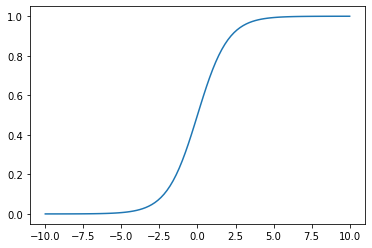

In [30]:
# Função logística no matplotlib.
x = np.linspace(-10, 10, 101)
sigma_log = 1 / (1 + np.exp(-x))

plt.plot(x, sigma_log)

<h3 style='font-size:30px;font-style:italic'> Training and Cost Function</h3>
<div> 
    <ul style='font-size:20px'>
        <li> 
             A função-custo da Regressão Logística é a log-loss. Essa faz com que a pontuação para uma probabilidade devidamente calibrada ao seu respectivo valor-alvo seja próxima de 0.
            $$
                J(\theta)=-\frac{1}{m}\sum_{i=1}^{m}[y^{(i)}\log{(\hat{p}^{(i)})} + (1-y^{(i)})\log{(1-\hat{p}^{(i)})}]
            $$
        </li>
        <li> 
            Seguem as derivadas parciais da log-loss:
            $$
                \frac{\partial}{\partial \theta_j}J(\theta)=\frac{1}{m}\sum_{i=1}^{m}(\sigma(\theta^{T}x^{(i)})-y^{(i)})x_j^{(i)}
            $$
        </li>
    </ul>
</div>

In [45]:
# O scikit-learn permite a Regressão Logística retornar apenas a probabilidade lançada pela função logística.
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
X,y = load_wine(return_X_y=True)

# O dataset é multi-classe, vamos torná-lo binário.
y = np.where(y==1, 1, 0)
X_scaled = StandardScaler().fit_transform(X)

<div> 
    <ul style='font-size:20px'>
        <li> 
             É possível regularizar o modelo com as normas L-1 e L-2. Atente-se, no entanto, às compatibilidades entre essas e os solvers.
        </li>
        <li> 
            'C' é o inverso de 'alpha'. Quanto maior seu valor, menos regularizado é o modelo.
        </li>
    </ul>
</div>

In [54]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(C=10,solver='lbfgs', penalty='l2')
log_reg.fit(X_scaled, y)

# A classe retorna as probabilidades computadas para cada classe.
log_reg.predict_proba(X_scaled)[:5]

array([[9.99992266e-01, 7.73371919e-06],
       [9.99049998e-01, 9.50001891e-04],
       [9.99985374e-01, 1.46259720e-05],
       [1.00000000e+00, 9.73438556e-11],
       [9.82714227e-01, 1.72857733e-02]])

<h2 style='font-size:30px'> Softmax Regression</h2>
<div> 
    <ul style='font-size:20px'>
        <li> 
             A Softmax Regression, ou Multinomial Logistic Regression, é a versão da Regressão Logística voltada a classificações multi-classe. Para cada classe, uma equação linear é gerada, tendo os seus coeficientes armazenados como vetores-linha da matriz-parâmetro $\Theta$. 
        </li>
        <li> 
            Os dados de cada instância são multiplicados com $\Theta$, produzindo um vetor com os scores da entidade para cada classe. Segue a equação do score da instância x para a classe k:
            $$
                s_k(x)=x^{T}\theta^{(k)}
            $$
        </li>
    </ul>
</div>

<h3 style='font-size:30px;font-style:italic'> Softmax Function</h3>
<div> 
    <ul style='font-size:20px'>
        <li> 
             A probabilidade de a entidade x pertencer à classe k é dada pela seguinte equação. É extraída a função exponencial em função do score dividida pela soma das exponenciais para todos os scores.
            $$
            \hat{p}_k=\sigma{(s(x))}_k=\frac{\exp(s_k(x))}{\sum_{j=1}^{K}\exp(s_j(x))}
            $$
        </li>
    </ul>
</div>

<script src="https://cdnjs.cloudflare.com/ajax/libs/mathjax/2.7.5/MathJax.js?config=TeX-AMS_SVG-full" type="text/javascript"></script>
<div> 
    <ul style='font-size:20px'>
        <li> 
             A classe prevista pelo modelo é aquela com a maior probabilidade:
            $$
                \hat{y}=\argmax_{k}\sigma{(s(x))}_k
            $$
        </li>
    </ul>
</div>

<h3 style='font-size:30px;font-style:italic'> Cross-Entropy</h3>
<div> 
    <ul style='font-size:20px'>
        <li> 
             A Cross-Entropy é a função-custo da Regressão Softmax. A média da soma dos produtos entre as probabilidades-alvo e o log das previstas para cada classe é extraída.
            $$
            J(\Theta)=-\frac{1}{m}\sum_{i=1}^{m}\sum_{k=1}^{K}y_k^{(i)}\log{\hat{p}_k^{(i)}}
            $$
        </li>
        <li> 
            $y_k^{(i)}$ é a probabilidade-alvo de a i-ésima instância pertencer à k-ésima classe. Sempre terá como valor 0 ou 1.
        </li>
        <li> 
            Segue o vetor de gradiente da Cross-Entropy para a classe k.
            $$
            \nabla_{\theta^{(k)}}J(\Theta)=\frac{1}{m}\sum_{i=1}^{m}(\hat{p}_k^{(i)}-y_k^{(i)})x^{(i)}
            $$
        </li>
    </ul>
</div>

<p style='color:red'> Criar um exemplo com a Softmax Regression